In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2
import os

plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util
from tf_unet import opends

In [3]:
import tensorflow as tf

def total_parameters():
    total_par = 0
    for variable in tf.trainable_variables():
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        total_par += variable_parameters
    return total_par

def bgr2rgb(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

def rgb2bgr(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2BGR)

In [4]:
# dp = image_gen.OpendsDataProvider('../db_opends/train_npy/*', data_suffix='.png', mask_suffix='.npy')
dp = opends.OpendsDataProvider('./opends_tf_unet/train/*', data_suffix='.png', mask_suffix='_iris.png')

Number of files used: 100
Number of channels: 3
Number of classes: 3


In [5]:
im, lb = dp(1)

im.shape: (1, 640, 400, 3)
lb.shape: (1, 640, 400, 3)


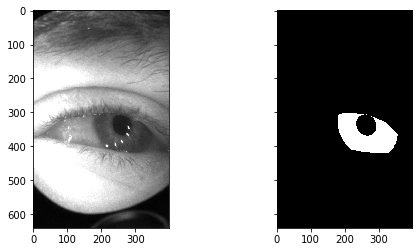

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(im[0,...])
ax[1].imshow(lb[0,...])
print(f'im.shape: {im.shape}\nlb.shape: {lb.shape}')

In [7]:
# net = unet.Unet(channels=dp.channels, n_class=dp.channels, layers=3, features_root=16)
net = unet.Unet(channels=dp.channels, n_class=dp.n_class, layers=3, features_root=16)

W0823 23:59:13.067739 139882424317760 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:189: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0823 23:59:13.069400 139882424317760 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:194: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 23:59:13.101141 139882424317760 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/layers.py:25: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0823 23:59:13.126199 139882424317760 deprecation.py:506] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/layers.py:39: calling 

In [8]:
# trainer = unet.Trainer(net, optimizer="adam", opt_kwargs=dict(learning_rate=1e-4))
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.1))
# trainer = unet.Trainer(net, optimizer="sgd", opt_kwargs=dict(learning_rate=1e-4))
# trainer = unet.Trainer(net, optimizer="rms", opt_kwargs=dict(learning_rate=1e-4))

In [9]:
print("This model has {:,} trainable parameters".format(total_parameters()))

This model has 117,075 trainable parameters


In [10]:
path = trainer.train(dp, "./unet_trained", training_iters=128, epochs=40, display_step=1)

W0823 23:59:14.124828 139882424317760 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:374: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W0823 23:59:14.136396 139882424317760 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:333: The name tf.train.exponential_decay is deprecated. Please use tf.compat.v1.train.exponential_decay instead.

W0823 23:59:14.146020 139882424317760 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:339: The name tf.train.MomentumOptimizer is deprecated. Please use tf.compat.v1.train.MomentumOptimizer instead.

W0823 23:59:14.656329 139882424317760 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py

Epoch 0 step (0/128) loss: 51.80068588256836


InvalidArgumentError: Infinity in summary histogram for: summaries/up_convolution_0/activations
	 [[node summaries/up_convolution_0/activations (defined at /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:164) ]]

Errors may have originated from an input operation.
Input Source operations connected to node summaries/up_convolution_0/activations:
 up_conv_0/Relu_2 (defined at /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:130)

Original stack trace for 'summaries/up_convolution_0/activations':
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/asyncio/base_events.py", line 1771, in _run_once
    handle._run()
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 378, in dispatch_queue
    yield self.process_one()
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tornado/gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tornado/gen.py", line 714, in __init__
    self.run()
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f40cbbc4ea3d>", line 2, in <module>
    net = unet.Unet(channels=dp.channels, n_class=dp.n_class, layers=3, features_root=16)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py", line 198, in __init__
    logits, self.variables, self.offset = create_conv_net(self.x, self.keep_prob, channels, n_class, **kwargs)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py", line 164, in create_conv_net
    tf.summary.histogram("up_convolution_%s" % k + '/activations', up_h_convs[k])
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tensorflow/python/summary/summary.py", line 179, in histogram
    tag=tag, values=values, name=scope)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tensorflow/python/ops/gen_logging_ops.py", line 329, in histogram_summary
    "HistogramSummary", tag=tag, values=values, name=name)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
x_test, y_test = dp(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

In [ ]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/rgb_problem.png")
x_test.shape, y_test.shape
print(f'x_test.shape: {x_test.shape}\ny_test.shape: {y_test.shape}')

In [ ]:
np.unique(prediction[0,...])

In [ ]:
prediction.shape